# The Primal Estimated Subgradient Solver for SVM (PEGASOS)

### reference: "Pegasos: Primal Estimated sub-GrAdient SOlver for SVM"

In [84]:
# Define the Pegasos solver
import numpy as np
def norm(x):
    """Calculate the l2 norm"""
    return np.sqrt(sum(x**2))


class PEGASOS(object):
    """the Primal Estimated subgradient SOlver for Svm
    reference: Pegasos: Primal Estimated sub-GrAdient SOlver for SVM"""
    def __init__(self,ll=0.9,m=5,Ni=30,random_state=1):
        self.random_state = random_state
        self.Ni = Ni
        self.m = m # mini-batch size
        self.lambda1=ll
        
    def fit(self,X,y):
        N = len(y)
        X = np.hstack([X,np.ones((N,1))]) 
        rgen = np.random.RandomState(self.random_state)
        for i in range(self.Ni):
            if i ==0:
                theta_old = np.zeros((X.shape[1]))
            else:
                theta_old = theta_new1
            #print(theta_old)    
            n = i+1
            idx = rgen.randint(low=0,high=N,size=self.m)
            mu = 1/(self.lambda1*n)
            subgradiants = [yy*xx for yy,xx in zip(y[idx],X[idx,:]) if yy*theta_old.T.dot(xx)< 1]
            if len(subgradiants)==0:
                theta_new = theta_old*(1-mu*self.lambda1)
            else:
                theta_new = theta_old*(1-mu*self.lambda1) + mu*np.mean(subgradiants,axis=0)
                
            theta_new1 = np.min([1,1/(np.sqrt(self.lambda1)*norm(theta_new))])*theta_new # projection on B(0,1/sqrt(lambda))            
        self.theta = theta_new1
    def predict(self,X):
        N=X.shape[0]
        X = np.hstack([X,np.ones((N,1))]) 
        return np.array([np.where(x.dot(self.theta) > 0, 1,-1) for x in X])

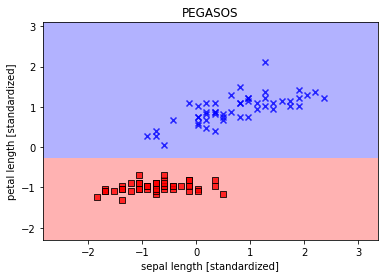

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Perceptron import plot_decision_regions

df=pd.read_csv('iris.data')
df.tail()

# extract setosa and versicolor
y = df.iloc[0:100,4].values
y = np.where(y =='Iris-setosa', -1,1)
# extract sepal length and petal length
X = df.iloc[0:100,[0,2]].values

# standardize the features
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean()) /X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean()) /X[:,1].std()

# instantiate the PEGASOS classifier
pegasos = PEGASOS(0.1,m=20,Ni=40,random_state=1)
pegasos.fit(X_std,y)

#print(pegasos.theta)
# plot the decision regions
plt.figure()
plot_decision_regions(X_std,y,classifier=pegasos)
plt.title(pegasos.__class__.__name__)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()
